In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load the CSV file
file_path = 'reddit_data_with_user_ids.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)
df.head()

,comment_id,parent_id,comment_author,comment_body,comment_score,sarcasm_score,source_id,target_id
0,llyp9sb,NaN,Frequent_Ad_5670,Can we discuss that „I support trans“ bit. I t...,1175,1,1,145
1,llza9kw,llyp9sb,GLink7,"Or how she was ""taken from him"" because of LGB...",484,0,2,1
2,llzxjkt,llza9kw,RuanaRulane,"Plus, he supports trans people soooo strongly,...",171,1,3,2
3,lm00q14,llzxjkt,Frequent_Ad_5670,Good point. He was probably talking about „tra...,59,1,4,3
4,lm0fpfp,llza9kw,SardonicSuperman,If I ever meet Elon I’m going to spit in his f...,18,1,5,2


In [3]:
# Step 2: Extract nodes and edges
#source_ids = df['source_id'].tolist()
#target_ids = df['target_id'].tolist()

# Create a list of edges (source, target)
#edges = list(zip(source_ids, target_ids))

# Step 3: Create tensors for the nodes and edges
# Convert source and target IDs into tensors
#source_tensor = torch.tensor(source_ids)
#target_tensor = torch.tensor(target_ids)

# Step 4: Plot the graph using networkx and matplotlib
G = nx.DiGraph()  # DiGraph() is for directed graphs

# Add edges to the graph
#G.add_edges_from(edges)

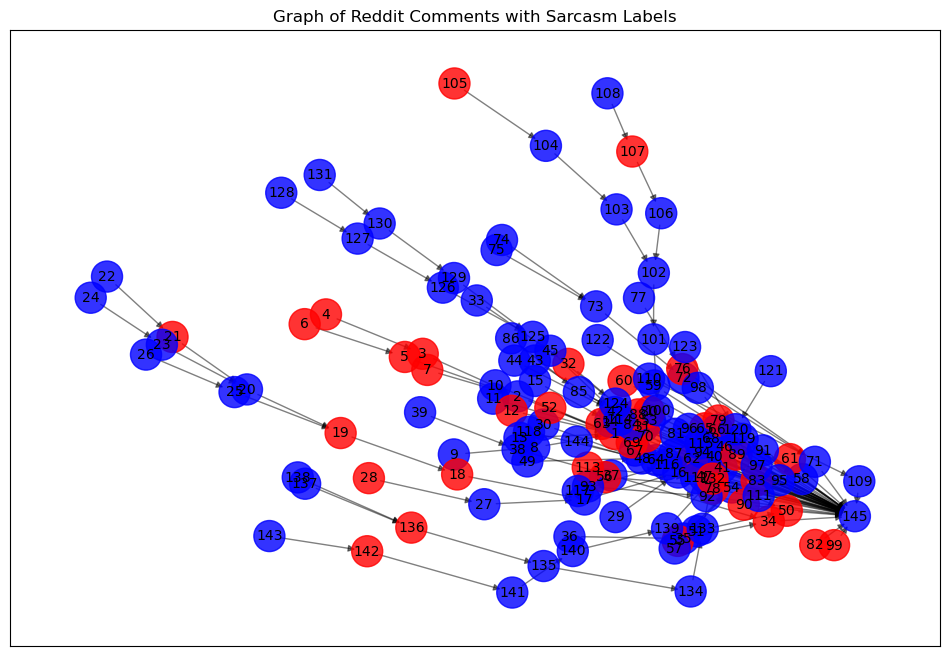

In [13]:
# Add nodes and attributes (comment_id as node ID and sarcasm_score as node attribute)
for index, row in df.iterrows():
    G.add_node(row['source_id'], sarcasm=row['sarcasm_score'])

# Add edges based on parent-child relationship (parent_id and comment_id)
for index, row in df.iterrows():
    if row['parent_id'] != 'NA':  # Ensure the comment has a parent
        G.add_edge(row['source_id'], row['target_id'])

# Define the layout for the graph (spring layout is often useful for visualizing graphs)
pos = nx.spring_layout(G)

# Define node colors based on sarcasm score, with a default value for nodes without the sarcasm attribute
node_color = [
    'red' if G.nodes[node].get('sarcasm', 0) == 1 else 'blue'  # Default to 0 if 'sarcasm' attribute is missing
    for node in G.nodes
]

# Plot the graph
plt.figure(figsize=(12, 8))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=500, alpha=0.8)

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.5)

# Add labels (optional, can be removed if too cluttered)
nx.draw_networkx_labels(G, pos, font_size=10)

# Display the plot
plt.title('Graph of Reddit Comments with Sarcasm Labels')
plt.show()